In [4]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sympy as sp

Ejercicio 1.

La viscocidad cinética del agua(vc) varía con la temperatura(T) de la siguiente manera:


| vc | T |
|-----------|-----------|
| 0 | 0.101 |
|21.1| 1.79 |
| 37.8| 1.13 |
| 54.4 | 0.696 |
| 71.1| 0.519|
| 87.8| 0.338|
| 100| 0.296 |

Utilice el método de su preferencia para interpolar vc en T=10,30,60,90 grados celsius


For x = 10.0, y = 1.7
For x = 30.0, y = 1.5
For x = 60.0, y = 0.6
For x = 90.0, y = 0.3


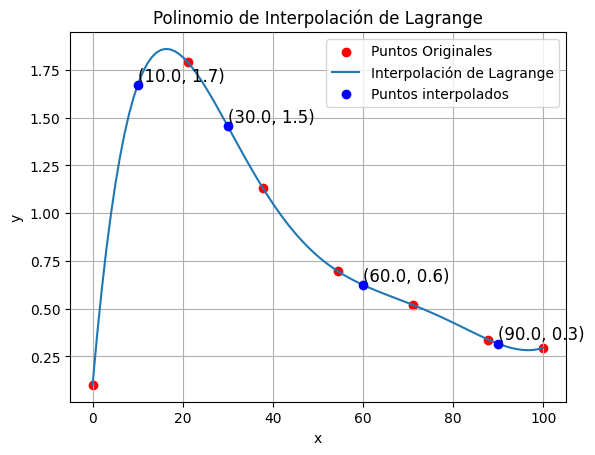

In [43]:
x = [0.0, 21.1, 37.8, 54.4, 71.1, 87.8, 100.0]
y = [0.101, 1.79, 1.13, 0.696, 0.519, 0.338, 0.296]
m = len(x)
n = m - 1
xp = [10.0, 30.0, 60.0, 90.0]

def lagrange_interpolation(xp, x_points, y_points):
    yp = 0
    for i in range(len(x_points)):
        yp += y_points[i] * lagrange_basis(xp, x_points, i)
    return yp



yp = [0, 0, 0, 0]
for i in range(len(xp)):
    yp[i] = lagrange_interpolation(xp[i], x, y)
    print("For x = %.1f, y = %.1f" % (xp[i], yp[i]))


# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)
y_interpolado = [lagrange_interpolation(x_val, x, y) for x_val in x_interpolado]



# Graficar los puntos originales
plt.scatter(x, y, label="Puntos Originales", color="red")

# Graficar el polinomio de interpolación de Lagrange
plt.plot(
    x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
)

# Graficar los valor interpolados
plt.scatter(xp, yp, color="blue", zorder=5, label='Puntos interpolados')
# Texto iterando sobre xp y yp
for i in range(len(xp)):
    plt.text(xp[i], yp[i], f"({xp[i]:.1f}, {yp[i]:.1f})", fontsize=12, verticalalignment="bottom")


# Añadir etiquetas y leyenda
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Ejercicio 2.

La tabla muestra como la densidad relativa (P) del aire varía con la altura (h).
Determine mediante interpolación de Lagrange la densidad relativa del aire a 10.5 km.

| h | P |
|-----------|-----------|
|  0|1 |
| 1.525 |0.8617 |
| 3.050 | 0.7385|
|4.575  |0.6292 |
| 6.10 | 	0.5328|
| 7.625| 0.4481|
| 9.150 |	0.3741 |



Enter x:  10.5


For x = 10.5, y = 0.3


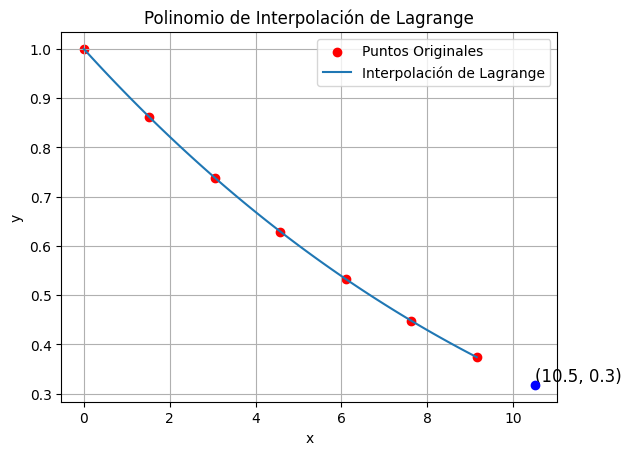

Polinomio de Interpolación de Lagrange:
y(x) = 0.565049180327869*x*(1.2 - 0.131147540983607*x)*(1.25 - 0.163934426229508*x)*(1.33333333333333 - 0.218579234972678*x)*(1.5 - 0.327868852459016*x)*(2.0 - 0.655737704918033*x) + 0.242131147540984*x*(1.5 - 0.163934426229508*x)*(1.66666666666667 - 0.218579234972678*x)*(2.0 - 0.327868852459016*x)*(3.0 - 0.655737704918033*x)*(0.655737704918033*x - 1.0) + 0.137530054644809*x*(2.0 - 0.218579234972678*x)*(2.5 - 0.327868852459016*x)*(4.0 - 0.655737704918033*x)*(0.327868852459016*x - 0.5)*(0.655737704918033*x - 2.0) + 0.087344262295082*x*(3.0 - 0.327868852459016*x)*(5.0 - 0.655737704918033*x)*(0.218579234972678*x - 0.333333333333333)*(0.327868852459016*x - 1.0)*(0.655737704918033*x - 3.0) + 0.0587672131147541*x*(6.0 - 0.655737704918033*x)*(0.163934426229508*x - 0.25)*(0.218579234972678*x - 0.666666666666667)*(0.327868852459016*x - 1.5)*(0.655737704918033*x - 4.0) + 0.0408852459016393*x*(0.131147540983607*x - 0.2)*(0.163934426229508*x - 0.5)*(0.218579

In [33]:
def lagrange_1(x_points, y_points, xp):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp (float): Punto en el que se desea interpolar.

    Retorna:
    yp (float): Valor interpolado en xp.
    """
    m = len(x_points)
    n = m - 1
    # Definir la variable simbólica
    x = sp.symbols("x")

    # Función para calcular los polinomios básicos de Lagrange
    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    # Función para calcular el polinomio de Lagrange
    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular el valor interpolado
    yp = lagrange_interpolation(xp, x_points, y_points)
    print("For x = %.1f, y = %.1f" % (xp, yp))

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar el polinomio de interpolación de Lagrange
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar el valor interpolado
    plt.scatter(xp, yp, color="blue", zorder=5)
    plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")

    # Añadir etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    # Construir el polinomio de interpolación simbólicamente
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    # Simplificar el polinomio
    polinomio_simplificado = sp.simplify(polinomio)

    # Imprimir el polinomio de interpolación
    print("Polinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp

try:
    x_points = [0.0, 1.525, 3.050, 4.575, 6.10, 7.625, 9.150]
    y_points = [1.0, 0.8617, 0.7385, 0.6292, 0.5328, 0.4481, 0.3741]
    xp = float(input("Enter x: "))
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")

Ejercicio 3.

La amplitud vibracional de un eje de transmisión es medida a varias velocidades. Los resultados son

| V(rpm) | A(mm) |
|-----------|-----------|
|  0|0|
| 400 |0.072|
| 800 | 0.233|
|1200  |0.712 |
| 1600 | 	3.400|

Utilice el método de interpolación más conveniente para graficar amplitud vs velocidad de 0 a 2500rpm (observe los intervalos de la tabla y determine el tamaño más conveniente de los intervalos).


           4             3             2
2.705e-12 x - 5.896e-09 x + 4.323e-06 x - 0.0007792 x
Para x= 1 y= -0.0007748491222949223


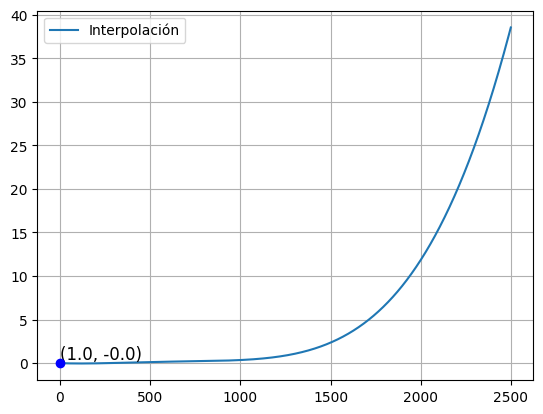

In [39]:
# Método de Lagrange con scipy
from scipy.interpolate import lagrange
x_points = [0.0, 400, 800,1200, 1600]
y_points = [0.0, 0.072, 0.233, 0.712, 3.400]
L = lagrange(x_points, y_points)


x1 = np.arange(0, 2500, 1)
xp = 1
yp = L(xp)
print(L)
print("Para x=", xp, "y=", yp)
# graficar valor interpolado

plt.plot(x1, L(x1), label="Interpolación")
#plt.plot(x, y, "o", label="Datos")
# Graficar el valor interpolado
plt.scatter(xp, yp, color="blue", zorder=5)
plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")


plt.legend()
plt.grid()
plt.show()